In [4]:
import pandas as pd 
df = pd.read_csv("bank-full.csv", delimiter=';', quoting=1)
df.shape

(45211, 17)

In [5]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [8]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


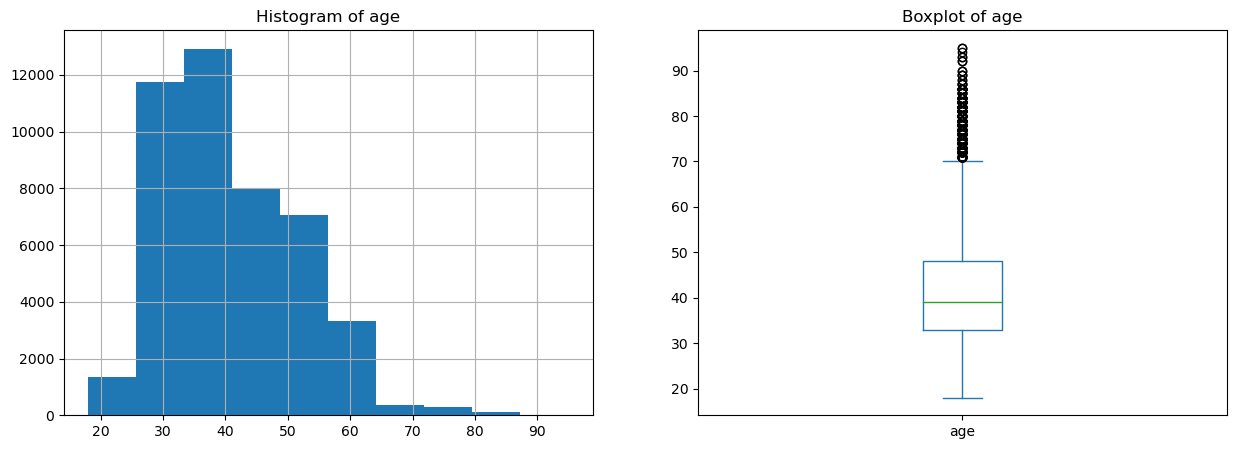

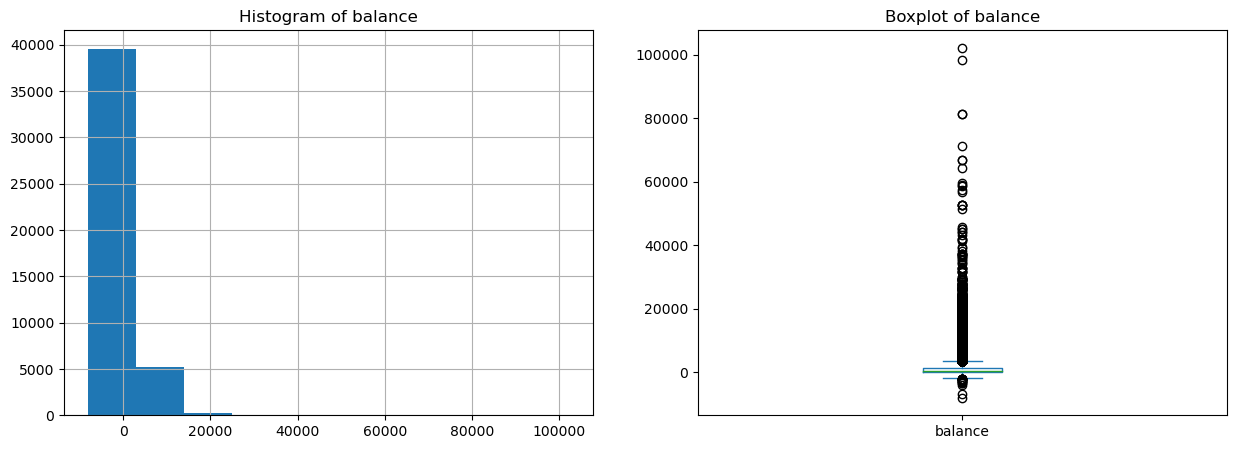

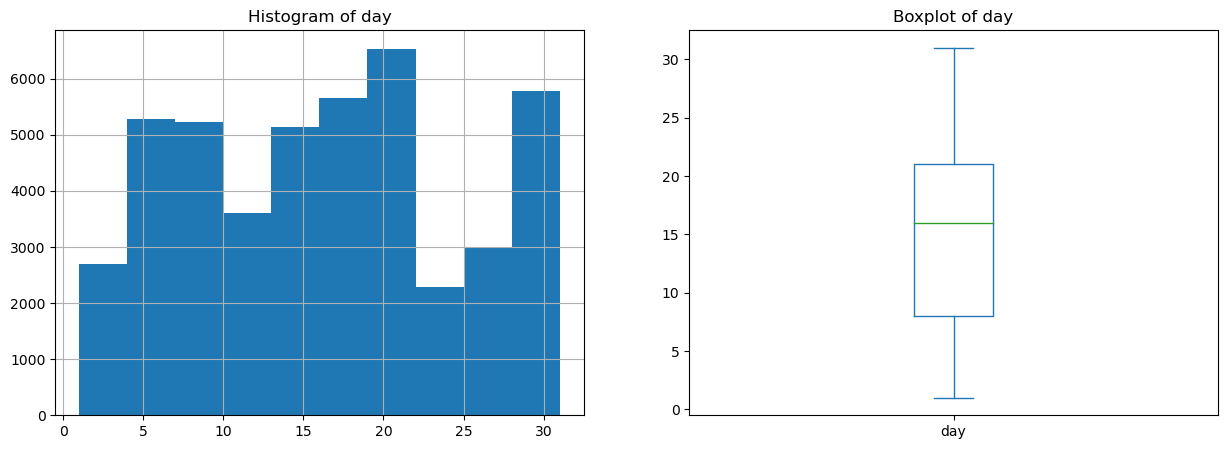

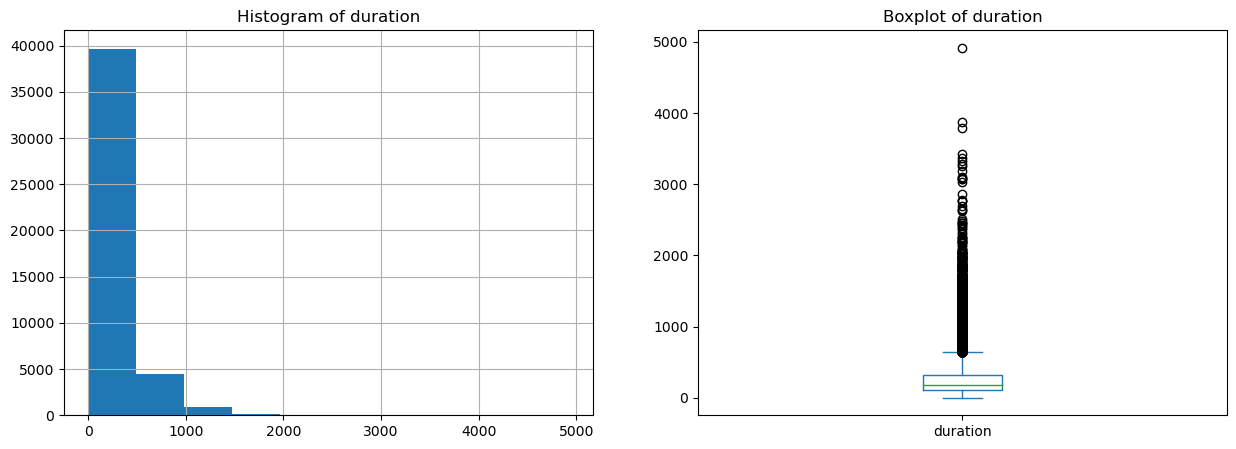

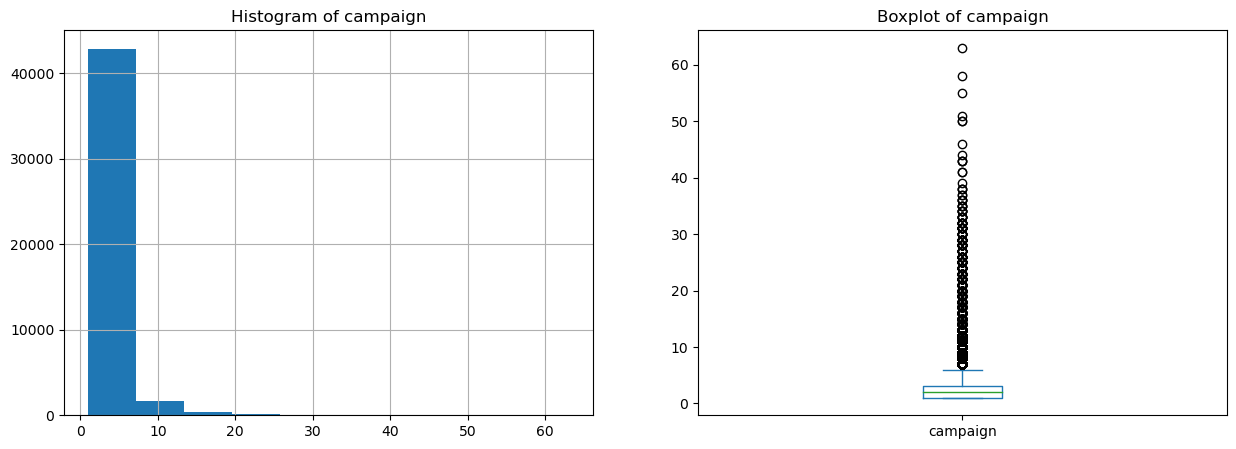

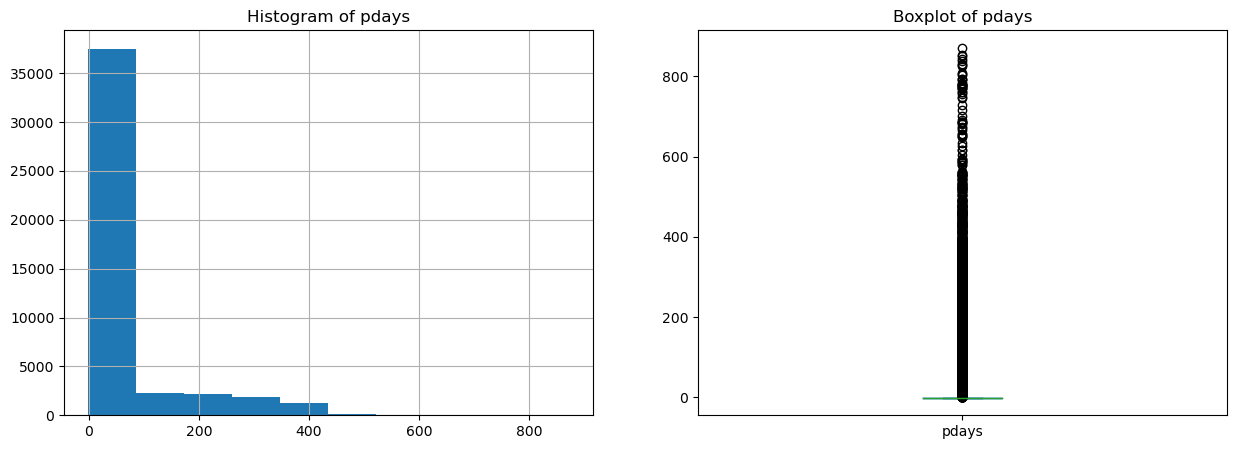

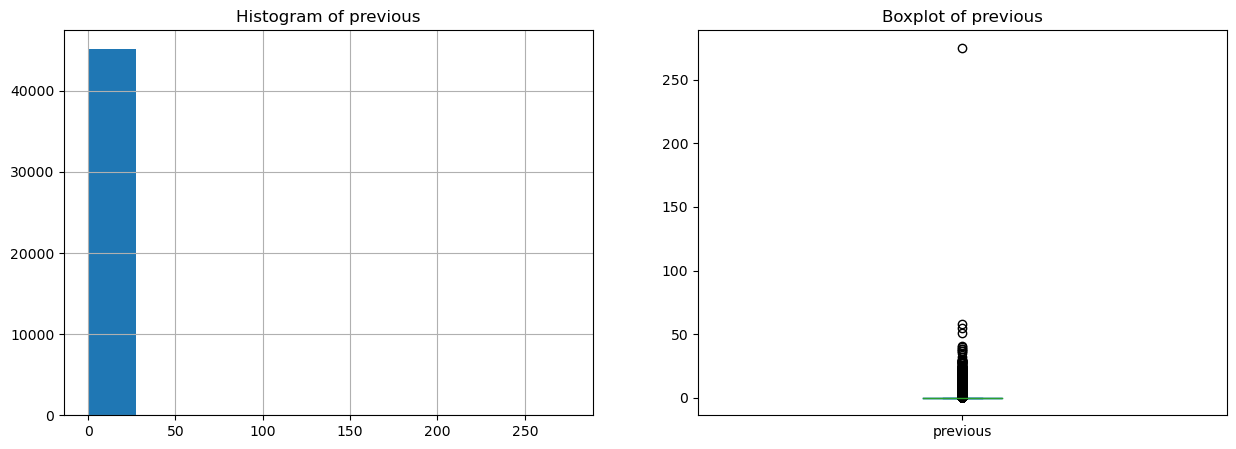

In [11]:
# performing EDA

import matplotlib.pyplot as plt
for column in list(df):
    if df[column].dtype == 'int64':
        # Create a figure with two subplots
        plt.figure(figsize=(15, 5))

        # First subplot: histogram
        plt.subplot(1, 2, 1)
        df[column].hist()
        plt.title(f'Histogram of {column}')

        # Second subplot: boxplot
        plt.subplot(1, 2, 2)
        df[column].plot(kind='box')
        plt.title(f'Boxplot of {column}')

        # Show the plot
        plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for column in list(df):
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [13]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


In [14]:
Y = df["y"] # assigning Y variable
X = df.iloc[:,0:16] # assigning X variable..
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3


In [15]:
# Importing LogisticRegression..
from sklearn.linear_model import LogisticRegression
Logreg = LogisticRegression()

In [16]:
# model fitting and finding intercept and cofficient values..
Logreg.fit(X,Y)
#B0
print("Intercept value:",Logreg.intercept_)
#B1
print("cofficient value:",Logreg.coef_)

Intercept value: [-0.07053186]
cofficient value: [[-3.16953577e-02  1.46017623e-02 -9.21358390e-02 -1.31759431e-02
  -4.79461243e-03  4.00494274e-05 -1.81633580e-01 -5.35163404e-02
  -1.86781476e-01 -8.42450313e-03 -5.99166242e-02  3.27159449e-03
  -2.67082636e-01 -1.23700099e-03  1.20014661e-01 -1.80601773e-01]]


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [20]:
Y_pred = Logreg.predict(X)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
# importing confussion metrics and accuracy score..
from sklearn.metrics import confusion_matrix,accuracy_score
Y_pred = Logreg.predict(X)
CM = confusion_matrix(Y,Y_pred)
CM

array([[39279,   643],
       [ 4437,   852]], dtype=int64)

In [22]:
ac = accuracy_score(Y, Y_pred)
print("Accuracy score", ac.round(3))

Accuracy score 0.888


In [24]:
from sklearn.metrics import recall_score,precision_score,f1_score
ac1=recall_score(Y,Y_pred)
print("sensitivity:",ac1.round(2))

ac2=precision_score(Y,Y_pred)
print("precision :",ac2.round(2))

ac3=f1_score(Y,Y_pred)
print("f1 :",ac3.round(2))

sensitivity: 0.16
precision : 0.57
f1 : 0.25


In [25]:
CM
TN=CM[0,0]
FP=CM[1,0]
specificity=TN/(TN+FP)
specificity
print("specificity score: ",specificity)

specificity score:  0.8985039802360691


In [26]:
df['Y_prob']= Logreg.predict_proba(X)[:,1]

In [27]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Y_prob
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0,0.051489
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0,0.051160
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0,0.053066
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0,0.039155
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0,0.096694


In [28]:
# ROC curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr,tpr,NA=roc_curve(Y,df['Y_prob'])

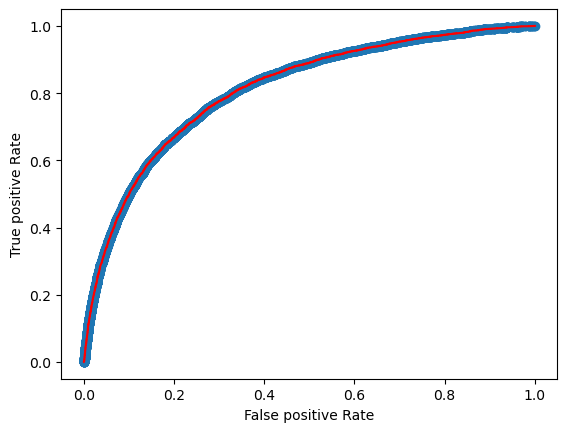

Area under curve score: 0.811


In [30]:
import matplotlib.pyplot as plt
plt.scatter(fpr,tpr)
plt.plot(fpr,tpr,color='red')
plt.xlabel("False positive Rate")
plt.ylabel("True positive Rate")
plt.show()
print("Area under curve score:", roc_auc_score(Y,df["Y_prob"]).round(3))